In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<center> 

## Data Mining project: 
####Predicting Gender of Students Based on Exams Scores. 
by:

Aya Hamrouni\
Motaz Saidani\
 Noura hssini\
  Safa trabelsi\
   Zied Ferah

### Outline : 

1- Data preprocessing

2- Data exploration

4- Data Modeling - Pre requisites

6- Logistic regression

7- KNN classifier

8- Decision trees

9- Naive bayes model

10- SVM model

11- Conclusions


<w>

### Description of the dataset :
This dataset contains marks secured by high school students in the US.
Our goal is to predict the gender of the students from their exam scores in certain fields. 



 ***Variables:***

* <b>Race/ethnicity</b> : 5 unique races/ethnicities in this table

* <b>Parental level of education:</b> The education background of the parents, in what level they finished their studies ? ( 6 Unique values)

* <b>lunch</b> : Do students pay normally for their lunch ? or they have a free/reduced lunch ? (2 unique values)

* <b>test preparation course</b> : did the student prepared for the tests or not ? ( 2 unique values)

* <b>Math percentage</b> : the math exam score / 100

* <b>Reading score percentage</b> : the reading score / 100

* <b>Writing score percentage</b> : the writing score / 100

* <b> gender </b> : the gender of the student ( Male or Female )

<w>

Loading Data:

In [51]:
!gdown --id 1uYvHLuPHMz7cH-i3cyugzTgP_5PKQ7IW

Downloading...
From: https://drive.google.com/uc?id=1uYvHLuPHMz7cH-i3cyugzTgP_5PKQ7IW
To: /content/Student Performance new.csv
100% 62.6k/62.6k [00:00<00:00, 48.5MB/s]


In [52]:
data = pd.read_csv('Student Performance new.csv')

In [53]:
print(data.shape)
data[:3]

(1000, 9)


,Unnamed: 0,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,gender
0,0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,2,group B,master's degree,standard,none,0.90,0.95,0.93,F


<w>

## I- Data Preprocessing

*Picking the relevant variables*

In [54]:
df = data.iloc[:,-4:]

df.head()

,math percentage,reading score percentage,writing score percentage,gender
0,0.72,0.72,0.74,F
1,0.69,0.90,0.88,F
2,0.90,0.95,0.93,F
3,0.47,0.57,0.44,M
4,0.76,0.78,0.75,M


*Checking for missing values*

In [55]:
df.isna().sum()

math percentage             0
reading score percentage    0
writing score percentage    0
gender                      0
dtype: int64

*Data types:*

In [56]:
df.dtypes

math percentage             float64
reading score percentage    float64
writing score percentage    float64
gender                       object
dtype: object

*Checking for the balance of target classes:*

In [57]:
df.gender.value_counts()

F    518
M    482
Name: gender, dtype: int64

*Renaming target classes:\
F : female\
M : male*

In [58]:
df.gender = df.gender.map(dict(F='female', M='male'))
df.head()

,math percentage,reading score percentage,writing score percentage,gender
0,0.72,0.72,0.74,female
1,0.69,0.90,0.88,female
2,0.90,0.95,0.93,female
3,0.47,0.57,0.44,male
4,0.76,0.78,0.75,male


Saving data:

In [59]:
df.to_csv(r'Student-Performance-clean.csv', index = False)

<w>

## II- Data exploration
*Descriptive statistics*


In [60]:
df.describe()

,math percentage,reading score percentage,writing score percentage
count,1000.000000,1000.000000,1000.000000
mean,0.660890,0.691690,0.680540
std,0.151631,0.146002,0.151957
min,0.000000,0.170000,0.100000
25%,0.570000,0.590000,0.577500
50%,0.660000,0.700000,0.690000
75%,0.770000,0.790000,0.790000
max,1.000000,1.000000,1.000000


In [61]:
df.corr()

,math percentage,reading score percentage,writing score percentage
math percentage,1.000000,0.817580,0.802642
reading score percentage,0.817580,1.000000,0.954598
writing score percentage,0.802642,0.954598,1.000000


*Visualizing variables distributions & relationships:*

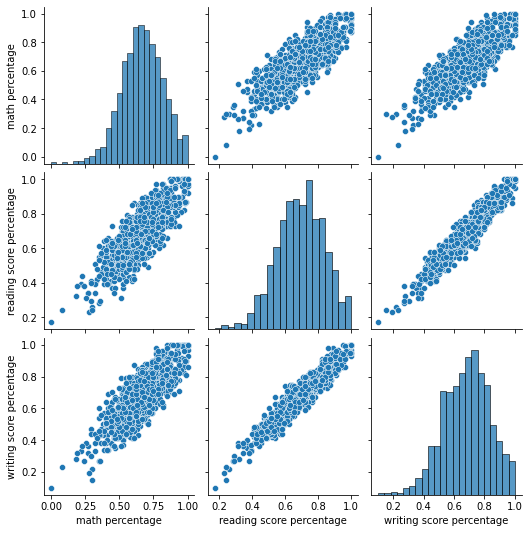

In [62]:
sns.pairplot(df.drop(['gender'],axis=1))
plt.show()

*Comparing distributions of each exam scores by gender:*

In [63]:
# Constants
mask_F = df.gender == 'female'
mask_M = df.gender == 'male'

female_obs = df[mask_F]
male_obs = df[mask_M]

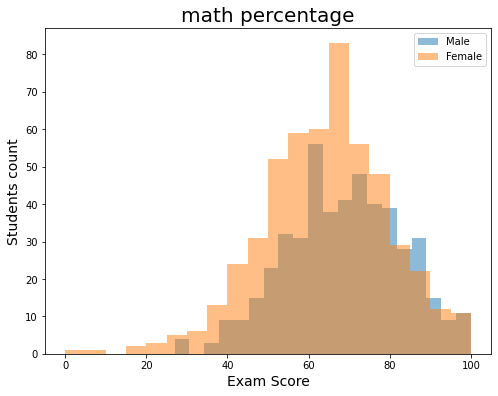

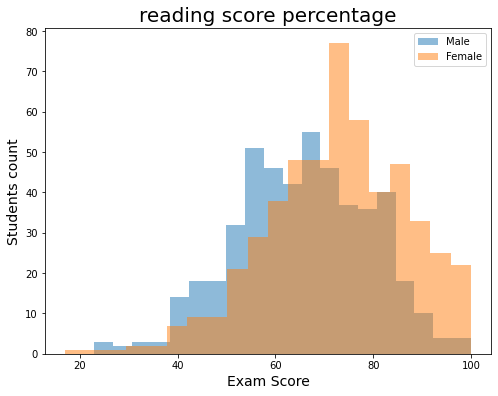

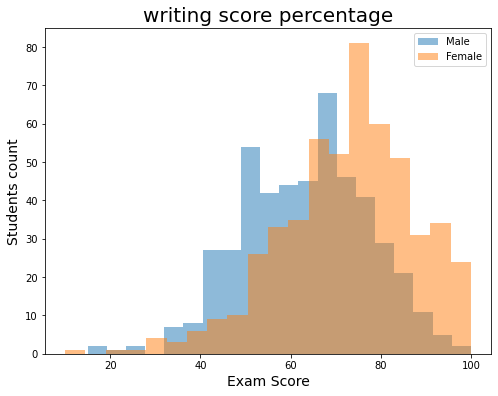

In [64]:
## Plots
for i in df.columns:
  if i != 'gender':
    plt.figure(figsize=(8,6))
    plt.hist(male_obs[i]*100, bins=20, alpha=0.5, label="Male")
    plt.hist(female_obs[i]*100, bins=20, alpha=0.5, label="Female")
    plt.xlabel("Exam Score", size=14)
    plt.ylabel("Students count", size=14)
    plt.title(i, size=20)
    plt.legend(loc='upper right')
    plt.show()
    if i == 'writing score percentage':
      break 

<w>

# III- Data modeling

##1) Splitting Data

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Feature selection
X = df.iloc[:,:3]
y = df.iloc[:,-1]
 
# Splitting ( test set sample size = 20%, training set = 80%)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=30)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (800, 3) (800,)
Test set: (200, 3) (200,)


In [67]:
## Is the sample representative ?

y_train.value_counts()

female    410
male      390
Name: gender, dtype: int64

##2) Custom Functions for Evaluation

In [68]:
#Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, jaccard_score, f1_score

In [69]:
#Confusion matrix
def confusion_matrix_plot(model, y, yhat):
  cm = confusion_matrix(y, yhat)
  cm_display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
  cm_display.plot(cmap='Greens')
  plt.show()


In [70]:
#Evaluation metrics
def model_evaluation(algorithm_name, yhat_test):
  
  balanced_accuracy_test = balanced_accuracy_score(y_test, yhat_test)
  accuracy_test = accuracy_score(y_test, yhat_test)
  precision = precision_score(y_test, yhat_test, pos_label='female')
  recall = recall_score(y_test, yhat_test, pos_label='female')
  jaccard = jaccard_score(y_test, yhat_test, pos_label='female')
  f1score = f1_score(y_test, yhat_test, average='weighted')

  evaluation_table = pd.DataFrame({'Test Accuracy': accuracy_test,
                                   'Precision': precision, 
                                   'Recall': recall,
                                   'Jaccard-Score': jaccard, 
                                   'F1-Score': f1score},
                                    index=[algorithm_name])
  
  return evaluation_table

## 3) Models:

### a) *Logistic Regression*

*Training*

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logistic_model = LogisticRegression(C=10, solver='liblinear')
logistic_model.fit(X_train, y_train)

LogisticRegression(C=10, solver='liblinear')

*Evaluation*



 Logistic Regression Confusion Matrix:


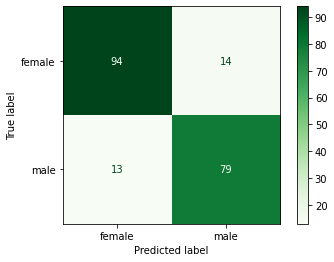



 Report:


,Test Accuracy,Precision,Recall,Jaccard-Score,F1-Score
Logistic Reg.,0.865,0.878505,0.87037,0.77686,0.865051


In [73]:
# yhat
yhat_logistic_test = logistic_model.predict(X_test)
yhat_prob_logistic_test = (logistic_model.predict_proba(X_test))[:,1]

# Confusion matrix
print('\n\n Logistic Regression Confusion Matrix:')
confusion_matrix_plot(logistic_model, y_test, yhat_logistic_test)

# Report
print('\n\n Report:')
logistic_eval = model_evaluation('Logistic Reg.', yhat_logistic_test)
logistic_eval

<w>

### b) *K-Nearest Neighbor*

*We further split the training sets into train and validation sets to find the best **k**.*




In [74]:
X_knn_train, X_knn_val, y_knn_train, y_knn_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)
print ('KNN Train Set:', X_knn_train.shape,  y_knn_train.shape)
print ('KNN Validation Set:', X_knn_val.shape,  y_knn_val.shape)

KNN Train Set: (640, 3) (640,)
KNN Validation Set: (160, 3) (160,)


*Finding the best* ***k***

In [75]:
from sklearn.neighbors import KNeighborsClassifier

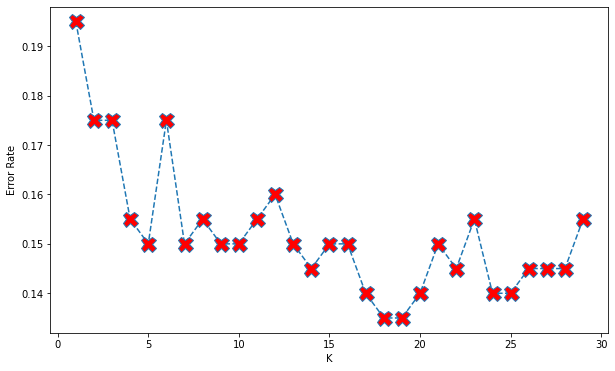

Min-Error: 0.135 at K = 18


In [76]:
## iterating using different 'K's
error_rate = []
for i in range(1,30):
 knn_trial = KNeighborsClassifier(n_neighbors=i)
 knn_trial.fit(X_knn_train,y_knn_train)
 knn_trial_yhat = knn_trial.predict(X_test)
 error_rate.append(np.mean(knn_trial_yhat != y_test))

## Visualizing the error
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate, linestyle='dashed', marker='X',markerfacecolor='red', markersize=15)
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
plt.show()

print("Min-Error:",min(error_rate),"at K =",req_k_value)

*Training the model on the whole training set*

In [77]:
k=18
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

*Evalution*



 KNN Confusion Matrix


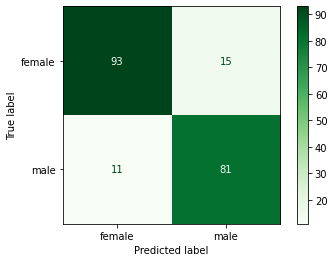



 Report:


,Test Accuracy,Precision,Recall,Jaccard-Score,F1-Score
KNN,0.87,0.894231,0.861111,0.781513,0.870157


In [78]:
# Constants
yhat_knn_test = knn_model.predict(X_test)
yhat_prob_knn_test = (knn_model.predict_proba(X_test))[:,1]

# Confusion Matrix
print('\n\n KNN Confusion Matrix')
confusion_matrix_plot(knn_model, y_test, yhat_knn_test)

# Report
print('\n\n Report:')
knn_eval = model_evaluation('KNN', yhat_knn_test)
knn_eval

<w>

### c) *Decision Tree*


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Tree Visualization
import pydotplus
from IPython.display import Image, HTML

Training

In [80]:
tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, max_leaf_nodes=7, random_state=100)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=7,
                       random_state=100)

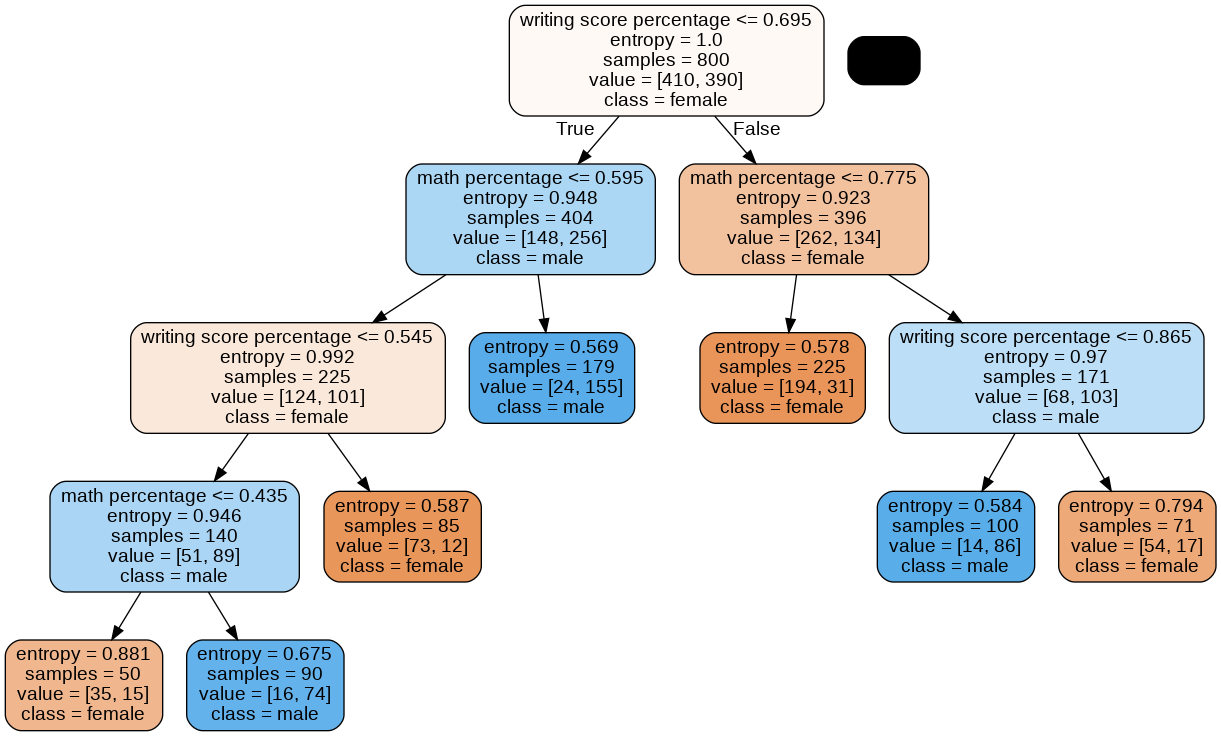

In [81]:
#Creating Dot Data
dot_data = tree.export_graphviz(tree_model, 
                                out_file=None, 
                                feature_names=list(X.columns.values), 
                                class_names=tree_model.classes_, 
                                rounded=True, 
                                filled=True) 

#Creating Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# displaying graph
Image(graph.create_png())

*Evaluation*



 Decision Tree Confusion Matrix


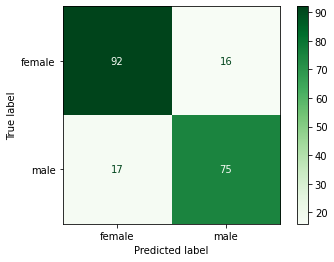



 Report:


,Test Accuracy,Precision,Recall,Jaccard-Score,F1-Score
Decision Tree,0.835,0.844037,0.851852,0.736,0.834929


In [91]:
# Constants
yhat_tree_test = tree_model.predict(X_test)
yhat_prob_tree_test = (tree_model.predict_proba(X_test))[:,1]

# Confusion Matrix
print('\n\n Decision Tree Confusion Matrix')
confusion_matrix_plot(tree_model, y_test, yhat_tree_test)

# Report
print('\n\n Report:')
tree_eval = model_evaluation('Decision Tree',  yhat_tree_test)
tree_eval

<w>

### d) *Support Vector Machine*

In [83]:
from sklearn import svm

*Training*

In [84]:
svm_model = svm.SVC(random_state=100, probability=True, C=10)
svm_model.fit(X_train, y_train) 

SVC(C=10, probability=True, random_state=100)

*Evaluation*



 SVM Confusion Matrix


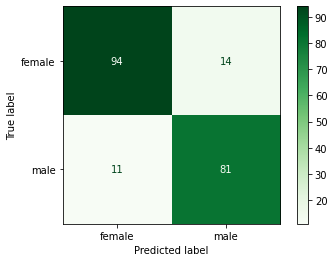



 Report:


,Test Accuracy,Precision,Recall,Jaccard-Score,F1-Score
SVM,0.875,0.895238,0.87037,0.789916,0.875122


In [85]:
# Constants
yhat_svm_test = svm_model.predict(X_test)
yhat_prob_svm_test = (svm_model.predict_proba(X_test))[:,1]

# Confusion Matrix
print('\n\n SVM Confusion Matrix')
confusion_matrix_plot(svm_model, y_test, yhat_svm_test)

# Report
print('\n\n Report:')
svm_eval = model_evaluation('SVM', yhat_svm_test)
svm_eval

<w>

# IV- Final Report




### 1) Generating Evaluation table & ROC-AUC graph:


In [86]:
from pandas.io.formats.style import Styler
from sklearn.metrics import roc_curve, auc

Evaluation Table

In [87]:
# Concatenating models evaluations
evaluation_table = pd.concat([logistic_eval, knn_eval, tree_eval, svm_eval])
# Rounding values
evaluation_table = evaluation_table.style.format('{:.2%}')
# Highliting mins and maxs
evaluation_table = evaluation_table.highlight_max(color='lightcyan').highlight_min(color='mistyrose')
# Adding title
evaluation_table = evaluation_table.set_caption('Evaluation of All Algorithms')
evaluation_table = evaluation_table.set_table_styles([{'selector': 'caption', 'props': [('color', 'black'),('font-size', '30px')]}])

ROC Curves

In [88]:
# Logistic ROC
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, yhat_prob_logistic_test, pos_label='male')
auc_logistic = auc(logistic_fpr, logistic_tpr)

# KNN ROC
knn_fpr, knn_tpr, threshold = roc_curve(y_test, yhat_prob_knn_test, pos_label='male')
auc_knn = auc(knn_fpr, knn_tpr)

# Tree ROC
tree_fpr, tree_tpr, threshold = roc_curve(y_test, yhat_prob_tree_test, pos_label='male')
auc_tree = auc(tree_fpr, tree_tpr)

# SVM ROC
svm_fpr, svm_tpr, threshold = roc_curve(y_test, yhat_prob_svm_test, pos_label='male')
auc_svm = auc(svm_fpr, svm_tpr)

In [89]:
def final_report():
  #evaluation table:
  display(evaluation_table)

  print('\n\n')

  #roc-auc graph:
  plt.figure(figsize=(5, 5), dpi=100)
  plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic Reg.(auc = %0.3f)' % auc_logistic)
  plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (auc = %0.3f)' % auc_knn)
  plt.plot(tree_fpr, tree_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_tree)
  plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_svm)
  plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label='Random')
  plt.title('ROC-AUC')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

<w>

## 2) Displaying Final Report:

,Test Accuracy,Precision,Recall,Jaccard-Score,F1-Score
Logistic Reg.,86.50%,87.85%,87.04%,77.69%,86.51%
KNN,87.00%,89.42%,86.11%,78.15%,87.02%
Decision Tree,83.50%,84.40%,85.19%,73.60%,83.49%
SVM,87.50%,89.52%,87.04%,78.99%,87.51%


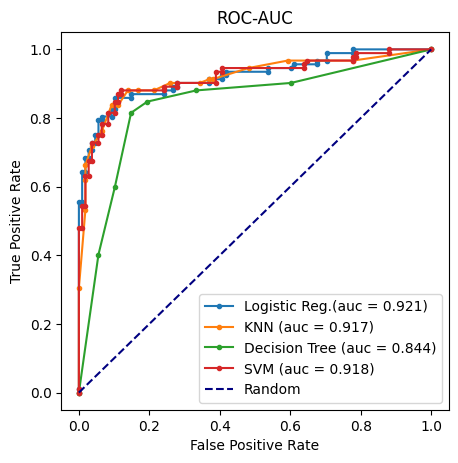

In [90]:
final_report()
